In [1]:
# import necessary packages
import os
import matplotlib.pyplot as plt
import geopandas as gpd
from descartes import PolygonPatch
import pandas as pd
import numpy as np
import seaborn as sns
import fiona
import cbsodata
import pyproj

In [2]:
buurten = gpd.read_file("data/neighborhoods/buurten.shp").drop(columns=["OPPERVLAKT","OMTREK","WIJKBUURTC","WIJKCODE","OCE_ID"])

In [3]:
buurt_name_list = pd.read_csv("data/buurten.csv",sep=";")
buurt_code = buurt_name_list[["BUURTCODE","BUURTNAAM"]]

In [4]:
buurt_data_19 = pd.DataFrame(cbsodata.get_data("84583NED"))

In [5]:
dh_buurt_data_19 = buurt_data_19[(buurt_data_19["Gemeentenaam_1"]=="'s-Gravenhage                           ") & (buurt_data_19["SoortRegio_2"]=="Buurt     ")]
total_dh_19 = dh_buurt_data_19[['WijkenEnBuurten','AantalInwoners_5','WestersTotaal_17','Marokko_19','NederlandseAntillenEnAruba_20','Suriname_21','Turkije_22','OverigNietWesters_23','GemiddeldeWoningwaarde_35','Koopwoningen_40','HuurwoningenTotaal_41','GIHandelEnHoreca_84','RUCultuurRecreatieOverigeDiensten_88','AfstandTotHuisartsenpraktijk_95','AfstandTotGroteSupermarkt_96','AfstandTotKinderdagverblijf_97','AfstandTotSchool_98']].rename(columns={'WijkenEnBuurten':'buurtname','AantalInwoners_5':'total_citizens','WestersTotaal_17':'total_western','Marokko_19':'morocco','NederlandseAntillenEnAruba_20':'antilles','Suriname_21':'suriname','Turkije_22':'turkey','OverigNietWesters_23':'other_non_western','GemiddeldeWoningwaarde_35':'avg_housevalue','Koopwoningen_40':'owned_houses','HuurwoningenTotaal_41':'rent_houses','GIHandelEnHoreca_84':'horeca_biz','RUCultuurRecreatieOverigeDiensten_88':'recreation_biz','AfstandTotHuisartsenpraktijk_95':'dist_GP','AfstandTotGroteSupermarkt_96':'dist_super','AfstandTotKinderdagverblijf_97':'dist_nursery','AfstandTotSchool_98':'dist_school'}, errors="raise").merge(buurt_code, left_on='buurtname', right_on='BUURTNAAM',validate="1:1").set_index("BUURTCODE").drop("BUURTNAAM",axis=1)

In [6]:
total_dh_19 = total_dh_19.sort_index()

In [7]:
buurten["BUURTCODE"] = buurten["BUURTCODE"].astype("int")

In [8]:
buurten = buurten.set_index("BUURTCODE").sort_index()

In [9]:
buurten["total_citizens"] = total_dh_19["total_citizens"]

In [10]:
#for some stupid reason, this function is really broken in Anaconda. I am too tired too fix it so I'll use an online converter.
#buurten = buurten.to_crs('EPSG:4326')

In [11]:
buurten = buurten.reset_index()

In [12]:
buurten = buurten.rename(columns= {"total_citizens":"c_total"})

In [13]:
buurten.to_file("output/buurten.shp")

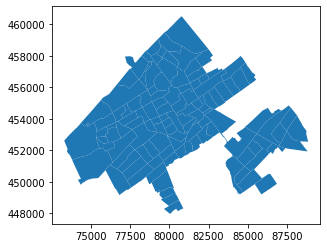

In [13]:
buurten.plot()

In [38]:
#TODO add distance to school!
amenities_data = dh_buurt_data_19[['WijkenEnBuurten','GIHandelEnHoreca_84',
 'RUCultuurRecreatieOverigeDiensten_88','AfstandTotHuisartsenpraktijk_95',
 'AfstandTotGroteSupermarkt_96', 'AfstandTotKinderdagverblijf_97']].rename(columns={'WijkenEnBuurten':'buurtname'}).merge(buurt_code, left_on='buurtname',
                                right_on='BUURTNAAM',validate="1:1").set_index("BUURTCODE").drop("BUURTNAAM",axis=1)

In [39]:
amenities_data = amenities_data.rename(columns={'GIHandelEnHoreca_84':"b_horeca",
 'RUCultuurRecreatieOverigeDiensten_88':"b_culture",'AfstandTotHuisartsenpraktijk_95':"d_gp",
 'AfstandTotGroteSupermarkt_96':"d_super", 'AfstandTotKinderdagverblijf_97':"d_nursery"}).sort_index()

In [40]:
amenities_data.to_csv("output/amenities_data.csv")

In [19]:
citizen_data = dh_buurt_data_19[['WijkenEnBuurten','Mannen_6',
 'Vrouwen_7','k_15Tot25Jaar_9','k_25Tot45Jaar_10',
 'k_45Tot65Jaar_11','k_65JaarOfOuder_12','WestersTotaal_17',
 'Marokko_19','NederlandseAntillenEnAruba_20','Suriname_21',
 'Turkije_22','OverigNietWesters_23']].rename(columns={'WijkenEnBuurten':'buurtname'}).merge(buurt_code, left_on='buurtname',
                                right_on='BUURTNAAM',validate="1:1").set_index("BUURTCODE").drop("BUURTNAAM",axis=1)

In [20]:
citizen_data = citizen_data.rename(columns={'Mannen_6':"men",
 'Vrouwen_7':"women",'k_15Tot25Jaar_9':"a_young",'k_25Tot45Jaar_10':"a_2540",
 'k_45Tot65Jaar_11':"a_4065",'k_65JaarOfOuder_12':"a_old",'WestersTotaal_17':"c_western",
 'Marokko_19':'c_morocco','NederlandseAntillenEnAruba_20':"c_antilles",'Suriname_21':"c_suriname",
 'Turkije_22':"c_turkey",'OverigNietWesters_23':"c_nonwestern"}).sort_index()

In [22]:
citizen_data["a_middle"] = citizen_data["a_2540"] + citizen_data["a_4065"]

In [26]:
citizen_data = citizen_data.drop(["a_2540","a_4065"],axis=1)

In [30]:
citizen_data.to_csv("output/citizen_data.csv")

In [14]:
housing_data = dh_buurt_data_19[['WijkenEnBuurten','Woningvoorraad_34',
 'GemiddeldeWoningwaarde_35','PercentageBewoond_38','PercentageOnbewoond_39',
 'Koopwoningen_40','HuurwoningenTotaal_41','InBezitWoningcorporatie_42',
 'InBezitOverigeVerhuurders_43']].rename(columns={'WijkenEnBuurten':'buurtname'}).merge(buurt_code, left_on='buurtname',
                                right_on='BUURTNAAM',validate="1:1").set_index("BUURTCODE").drop("BUURTNAAM",axis=1)

In [15]:
housing_data = housing_data.rename(columns={"Woningvoorraad_34":"houses","GemiddeldeWoningwaarde_35":"avg_price","PercentageBewoond_38":"p_occupied","PercentageOnbewoond_39":"p_free","Koopwoningen_40":"bought_houses","HuurwoningenTotaal_41":"rented_houses","InBezitWoningcorporatie_42":"rent_corp","InBezitOverigeVerhuurders_43":"rent_private"}).sort_index()

In [16]:
housing_data.fillna(0).to_csv("output/housing_data.csv")

In [32]:
pd.DataFrame(sorted(buurt_code["BUURTCODE"])).to_csv("output/buurtcodes.csv")

In [17]:
list(dh_buurt_data_19.columns)

['ID',
 'WijkenEnBuurten',
 'Gemeentenaam_1',
 'SoortRegio_2',
 'Codering_3',
 'IndelingswijzigingWijkenEnBuurten_4',
 'AantalInwoners_5',
 'Mannen_6',
 'Vrouwen_7',
 'k_0Tot15Jaar_8',
 'k_15Tot25Jaar_9',
 'k_25Tot45Jaar_10',
 'k_45Tot65Jaar_11',
 'k_65JaarOfOuder_12',
 'Ongehuwd_13',
 'Gehuwd_14',
 'Gescheiden_15',
 'Verweduwd_16',
 'WestersTotaal_17',
 'NietWestersTotaal_18',
 'Marokko_19',
 'NederlandseAntillenEnAruba_20',
 'Suriname_21',
 'Turkije_22',
 'OverigNietWesters_23',
 'GeboorteTotaal_24',
 'GeboorteRelatief_25',
 'SterfteTotaal_26',
 'SterfteRelatief_27',
 'HuishoudensTotaal_28',
 'Eenpersoonshuishoudens_29',
 'HuishoudensZonderKinderen_30',
 'HuishoudensMetKinderen_31',
 'GemiddeldeHuishoudensgrootte_32',
 'Bevolkingsdichtheid_33',
 'Woningvoorraad_34',
 'GemiddeldeWoningwaarde_35',
 'PercentageEengezinswoning_36',
 'PercentageMeergezinswoning_37',
 'PercentageBewoond_38',
 'PercentageOnbewoond_39',
 'Koopwoningen_40',
 'HuurwoningenTotaal_41',
 'InBezitWoningcorporatie_

In [41]:
amenities_data

,buurtname,b_horeca,b_culture,d_gp,d_super,d_nursery
BUURTCODE,,,,,,
1,Oud Scheveningen,70.0,55.0,0.4,0.4,0.2
2,Vissershaven,180.0,80.0,0.6,0.5,0.3
3,Scheveningen Badplaats,175.0,145.0,0.3,0.6,0.3
4,Visserijbuurt,90.0,90.0,0.3,0.3,0.3
5,Van Stolkpark en Scheveningse Bosjes,15.0,45.0,0.7,0.8,0.3
...,...,...,...,...,...,...
117,De Rivieren,150.0,35.0,1.1,1.4,0.4
118,De Lanen,40.0,35.0,1.2,1.1,0.6
119,De Velden,65.0,40.0,1.2,1.0,0.6
